# ROOT histograms

[Histogram class documentation](https://root.cern.ch/doc/master/classTH1.html)

ROOT has powerful histogram objects that, among other features, let you produce complex plots and perform fits of arbitrary functions.

`TH1F` is a 1D histogram with Floating point y-axis, `TH2I` is a 2D histogram with Integer y-axis, etc.

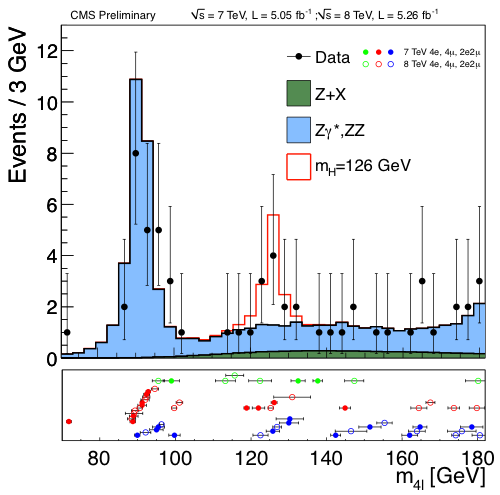

In [ ]:
import ROOT
h = ROOT.TH1D(name="h", title="My histo", nbinsx=100, xlow=-5, xup=5)

# fill this histogram with 5000 normally distributed values
h.FillRandom("gaus", ntimes=5000)

To take a quick peek at a function signature, we can use the notebook's `?` feature:

In [ ]:
?ROOT.TH1D.FillRandom

To check the full documentation you can always refer to https://root.cern/doc/master (and then switch to the documentation for your particular ROOT version with the drop-down menu at the top of the page).

## Drawing a histogram

[Drawing options documentation](https://root.cern.ch/doc/master/classTHistPainter.html)

The link above contains the documentation for the histogram drawing options.

In a notebook, as usual, we want to also use the `%jsroot on` magic and also explicitly draw a `TCanvas`.

In [ ]:
%jsroot on
c = ROOT.TCanvas()
#h.SetLineColor(ROOT.kBlue)
#h.SetFillColor(ROOT.kBlue)
#h.GetXaxis().SetTitle("value")
#h.GetYaxis().SetTitle("count")
#h.SetTitle("My histo with latex: p_{t}, #eta, #phi")
h.Draw() # draw the histogram on the canvas
c.Draw() # draw the canvas on the screen

# ROOT functions

The type that represents an arbitrary one-dimensional mathematical function in ROOT is [TF1](https://root.cern.ch/doc/master/classTF1.html).<br>
Similarly, [TF2](https://root.cern.ch/doc/master/classTF2.html) and [TF3](https://root.cern.ch/doc/master/classTF3.html) represent 2-dimensional and 3-dimensional functions.

As an example, let's define and plot a simple surface:

In [ ]:
f2 = ROOT.TF2("f2", "sin(x*x - y*y)", xmin=-2 , xmax=2, ymin=-2, ymax=2)

In [ ]:
%jsroot on
c = ROOT.TCanvas()
f2.Draw("surf1") # to get a surface instead of the default contour plot
c.Draw()

## Fitting a histogram

Let's see how to perform simple histogram fits of arbitrary functions. We will need a `TF1` that represents the function we want to use for the fit.

This time we define our `TF1` as a C++ function (note the usage of the `%%cpp -d` magic to define some C++ inline. Here we define a simple gaussian with scale and mean parameters (`par[0]` and `par[1]` respectively):

In [ ]:
%%cpp -d

double gaussian(double *x, double *par) {
    return par[0]*TMath::Exp(-TMath::Power(x[0] - par[1], 2.) / 2.)
           / TMath::Sqrt(2 * TMath::Pi());
}

The function signature, that takes an array of coordinates and an array of parameters as inputs, is the generic signature of functions that can be used to construct a `TF1` object:

In [ ]:
fitFunc = ROOT.TF1("fitFunc", ROOT.gaussian, xmin=-5, xmax=5, npar=2)

Now we fit our `h` histogram with `fitFunc`:

In [ ]:
h.Fit(fitFunc);

Drawing the histogram now automatically also shows the fitted function:

In [ ]:
c2 = ROOT.TCanvas()
h.Draw()
c2.Draw()

For the particular case of a gaussian fit, we could also have used the built-in `"gaus"` function, as we did when we called `FillRandom`:

In [ ]:
h.Fit("gaus");

In [ ]:
c3 = ROOT.TCanvas()
h.Draw()
c3.Draw()

For more complex binned and unbinned likelihood fits, check out [RooFit](https://root.cern.ch/download/doc/RooFit_Users_Manual_2.91-33.pdf), a powerful data modelling framework integrated in ROOT.

## ROOT graphs

[TGraph](https://root.cern/doc/master/classTGraph.html) is a type useful for scatter plots.

Their drawing options are documented [here](https://root.cern/doc/master/classTGraphPainter.html).

Like for histograms, the aspect of `TGraph`s can be greatly customized, they can be fitted with custom functions, etc. 

In [ ]:
g = ROOT.TGraph()

for x in range(-20, 21):
    y = -x*x
    g.AddPoint(x, y)

c4 = ROOT.TCanvas()
g.SetMarkerStyle(7)
g.SetLineColor(ROOT.kBlue)
g.SetTitle("My graph")
g.Draw("ALP")
c4.Draw()

The same graph can be displayed as a bar plot:

In [ ]:
c5 = ROOT.TCanvas()
g.SetTitle("My graph")
g.SetFillColor(ROOT.kOrange + 1) # base colors can be tweaked by adding/subtracting values to them 
g.Draw("AB1")
c5.Draw()